<a href="https://colab.research.google.com/github/guilhermelaviola/CustomerChurnPredictionModel/blob/main/CustomerChurnPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# In this example we can see a Customer Churn Prediction Model usning
# Random Forests algorithm

# First let's import the essential libraries
import pandas as pd

df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Displaying the variables with more details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# In this particular case, each user if identified through a unique customer ID.
# This dataset has 19 variables that are used to predict the churn.
# Customer churn is defined by customers who have left (churned)
# within the past month.

# In order to confirm this information, let's count the number of customers in the
# dataset who have churned.

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

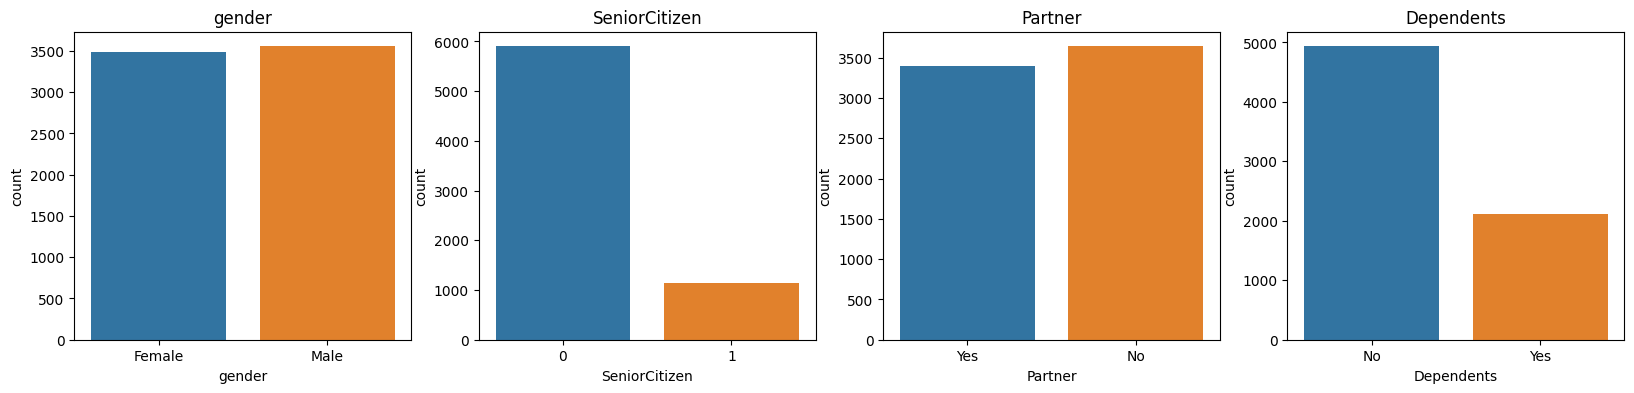

In [5]:
# Only around 27% of the customers in the dataset have churned.
# This means that we are dealing with an imbalanced classification
# problem. We will need to perform some feature engineering to create
# a balanced training dataset before building the predictive model.

# Exloratory Data Analysis for Customer Churn Prediction
# We're gonna perform this analysis in order for us to gain a better
# understanding of the independent variables in the dataset as their
# relationship with the customer churn.

# Let's start by imported the necessary libraries and then analyzing
# the demographic data points.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
numerical = cols

plt.figure(figsize=(20, 4))

for i, col in enumerate(numerical):
  ax = plt.subplot(1, len(numerical), i+1)
  sns.countplot(x = str(col), data = df)
  ax.set_title(f'{col}')